[Persim 0.3.1 documentation](https://persim.scikit-tda.org/en/latest/notebooks/Persistence%20images.html#Generate-a-persistence-diagram-using-Ripser)

In [1]:
from itertools import product

import time
import numpy as np
from sklearn import datasets
from scipy.stats import multivariate_normal as mvn
import matplotlib.pyplot as plt

from ripser import Rips
from persim import PersistenceImager

import os

import seaborn
import pandas as pd

In [3]:
# data = np.loadtxt(r"C:\Users\yui\OneDrive\Code\Py\TDA\myfed_attack_save\vr_metric04-22--17-43-28.dat")
dir = os.listdir("./metric")
data = []
for metric in dir:
    if metric[len("vr_metric_single="):len("vr_metric_single=")+len("cifar_test_moreFC=")] == "cifar_test_moreFC=":
        data.append([np.loadtxt("./metric/"+metric), metric])
        print(metric)

vr_metric_single=cifar_test_moreFC=6-07--17-43-29.pth06-07--20-53-23.dat
vr_metric_single=cifar_test_moreFC=6-07--17-43-29.pth06-07--20-57-24.dat


In [11]:
# # data = np.loadtxt(r"C:\Users\yui\OneDrive\Code\Py\TDA\myfed_attack_save\vr_metric04-22--17-43-28.dat")
# dir = os.listdir("./metric")
# at = 9
# no = 0
# for mt in dir:
#     if mt[16:16+len("attack"+str(at)+"normal"+str(no))] == "attack"+str(at)+"normal"+str(no) :
#         data = np.loadtxt("./metric/"+mt)
#         name = mt
#         print(name)

In [4]:
for i in range(len(data)):
    data[i][0] = abs(data[i][0]) * 100

In [13]:
# points = []

# for i in range(data.shape[0]):
#     for j in range(data.shape[1]):
#         points.append([i, j, abs(data[i][j])])

# x=[point[0] for point in points]
# y=[point[1] for point in points]
# z=[point[2] for point in points]

# fig=plt.figure(dpi=120)
# ax=fig.add_subplot(111,projection='3d')
# plt.title('point cloud')
# ax.scatter(x,y,z,c='b',marker='.',s=2,linewidth=0,alpha=1,cmap='spectral')

# #ax.set_facecolor((0,0,0))
# ax.axis('auto')
# # ax.xaxis.set_visible(False)
# # ax.yaxis.set_visible(False)
# ax.set_xlabel('X Label')
# ax.set_ylabel('Y Label')
# ax.set_zlabel('Z Label')
# plt.show()

In [5]:
rips = Rips(maxdim=2)
dgms = []
H0_dgm = []
H1_dgm = []
for d in data:
    dgms.append(rips.fit_transform(d[0], distance_matrix = True))
    H1_dgm.append([dgms[-1][1],d[1]])
    H0_dgm.append([dgms[-1][0],d[1]])


Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


In [6]:
def gridsize(h_gdm):
    s = [999,0,999,0]
    for h in h_gdm:
        s[0] = s[0] if h[0] > s[0] else h[0]
        s[1] = s[1] if h[0] < s[1] else h[0]
        s[2] = s[2] if h[1] > s[2] else h[1]
        s[3] = s[3] if h[1] < s[3] else h[1]
    return s
def makegrid(h_gdm, s):
    height = (s[1] - s[0]) / 126
    weight = (s[3] - s[2]) / 126
    grid = np.zeros((128,128))
    for h in h_gdm:
        x = y = 0
        while 1:
            if (h[0] < s[0] + x * height):
                break
            x += 1
        while 1:
            if (h[1] < s[2] + y * weight):
                break
            y += 1
        grid[x][y] += 1
    return grid

In [7]:
for h1 in H1_dgm:
    print(len(h1[0]))
    print(gridsize(h1[0]))
    print(makegrid(h1[0],gridsize(h1[0])))
    np.savetxt("./grids/h_"+h1[1]+".dat", makegrid(h1[0],gridsize(h1[0])))

563
[0.47099998593330383, 10.357000350952148, 1.4589999914169312, 11.89900016784668]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
11449
[0.004000000189989805, 0.7250000238418579, 0.024000000208616257, 1.090000033378601]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


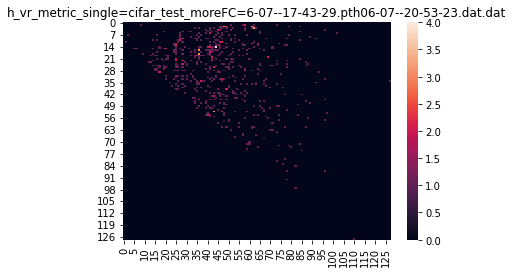

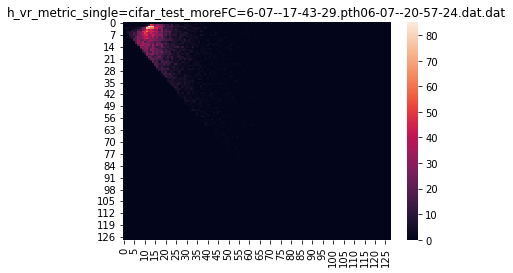

In [8]:
dir = os.listdir("./grids")
for Gr in dir:
    grid = np.loadtxt("./grids/"+Gr)
    grid = pd.DataFrame(grid)

    plot = seaborn.heatmap(grid)
    plt.title(Gr)
    plt.show()